<a href="https://colab.research.google.com/github/dp-08/Neural-Networks-Projects-/blob/main/NNDL_MNIST_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt
import random

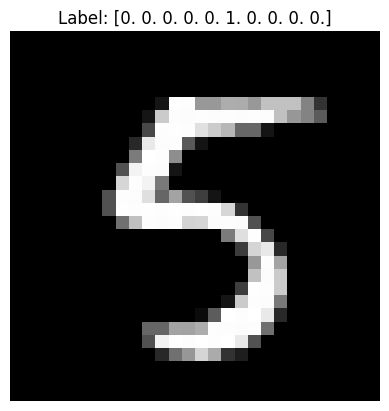

In [ ]:
def display_image(image, label):
    plt.imshow(image.reshape(28, 28), cmap='gray') # Reshape the image to 28x28
    plt.title("Label: " + str(label))
    plt.axis('off')
    plt.show()

# Generate a random index within the range of the dataset
random_index = random.randint(0, len(x_train) - 1)

# Display the image and label using the random index
display_image(x_train[random_index], y_train[random_index])

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9580 - loss: 0.1606 - val_accuracy: 0.9506 - val_loss: 0.2026
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9655 - loss: 0.1216 - val_accuracy: 0.9563 - val_loss: 0.1665
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9704 - loss: 0.1034 - val_accuracy: 0.9598 - val_loss: 0.1688
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9740 - loss: 0.0910 - val_accuracy: 0.9653 - val_loss: 0.1426
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9760 - loss: 0.0834 - val_accuracy: 0.9607 - val_loss: 0.1893


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9533 - loss: 0.2420
Test accuracy: 0.9610


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


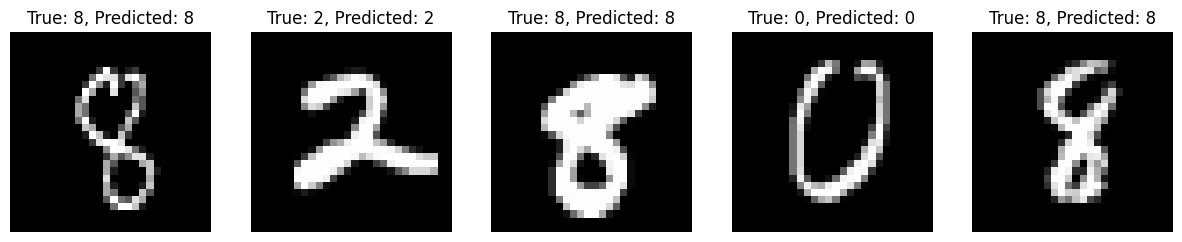

In [ ]:
import numpy as np

# Select a few random images from the test set
num_images = 5
random_indices = np.random.choice(len(x_test), size=num_images, replace=False)
images = x_test[random_indices]
labels = y_test[random_indices]

# Get predictions from the model
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Display images with predicted labels
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {np.argmax(labels[i])}, Predicted: {predicted_labels[i]}")
    ax.axis('off')

plt.show()